In [77]:
using EDM4hep
using EDM4hep.RootIO
using Plots, FHist

# some additional unitilities
θ(v::Vector3d) = atan(√(v.x^2+v.y^2), v.z)  # Could be addded to Components.jl
ϕ(v::Vector3d) = atan(v.y, v.x)

ϕ (generic function with 1 method)

In [78]:
file = "/Users/mato/Downloads/E250-SetA.P4f_sw_sl.Gwhizard-2_8_5.eL.pR.I500106.0.1000.REC_edm4hep.root"
reader = RootIO.Reader(file)
events = RootIO.get(reader, "events");

In [79]:
h_total_theta = Hist1D(bins=range(0.,1.,41));
h_pass_theta = Hist1D(bins=range(0.,1.,41));

In [84]:
all = 0
found = 0
empty!(h_total_theta)
empty!(h_pass_theta)

@time for evt in events
    all += 1
    mcparticles = RootIO.get(reader, evt, "MCParticles")
    # search first genStat 1 electron
    idx = findfirst(p -> abs(p.PDG) == 11 && p.generatorStatus == 1, mcparticles)
    mcp = mcparticles[idx]
    push!(h_total_theta, θ(mcp.momentum)/π)

    mctruthrecolinks = RootIO.get(reader, evt, "SiTracksMCTruthLink")
    # meh need to do the whole logic as in my marlin pidutil
    # lets just care about tracks its simpler
    # argh this can also have more than one track per electron
    for link in mctruthrecolinks
        if link.sim == mcp && link.weight > 0.99
            found += 1
            push!(h_pass_theta, θ(mcp.momentum)/π)
            break
        end
    end
end
println("track reco eff: $(found/all)")

  1.939787 seconds (826.27 k allocations: 823.629 MiB, 2.10% gc time, 0.59% compilation time)
track reco eff: 0.936


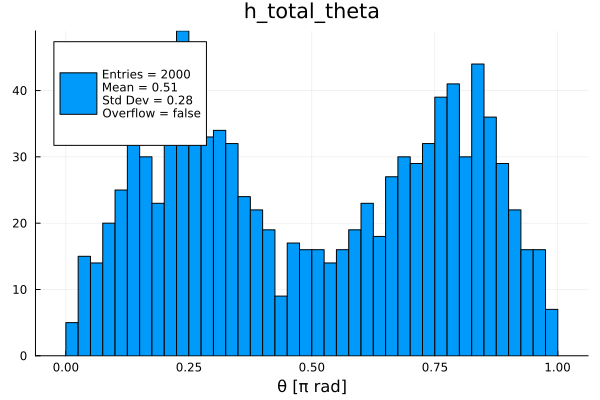

In [85]:
plot(h_total_theta, title="h_total_theta", xlabel="θ [π rad]")

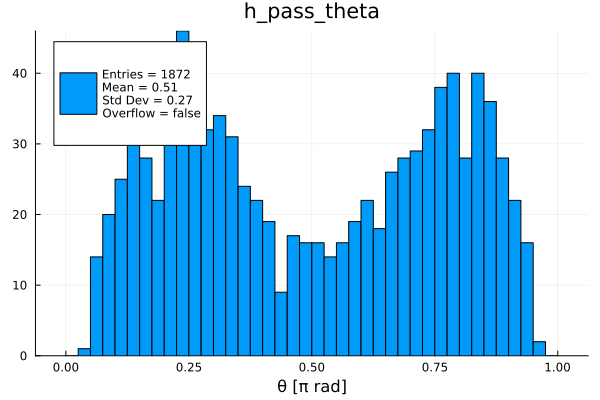

In [86]:
plot(h_pass_theta, title="h_pass_theta", xlabel="θ [π rad]")

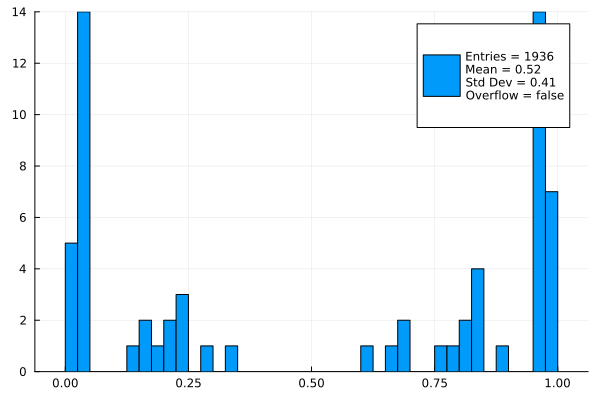

In [83]:
plot(h_total_theta - h_pass_theta)